In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/dspk')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1f61EsvXy-CoB58sVHUsIoiDLkEBqkSUx/dspk


## Dataset

The dataset comprises several features such as age, sex, race, height, weight, and the number of victims, along with the type of crime and whether it is domestic in nature.

#### Source: https://data.world/datasets/crime

In [ ]:
# Load the dataset
df = pd.read_csv('Crime.csv')
df.head()

,Unnamed: 0,PRIMARY_TYPE,AGE,SEX,RACE,DOMESTIC_I,NUMBER_OF_VICTIMS,Height,Weight
0,0,NON-SHOOTING HOMICIDE,70 - 79,M,BLK,False,7,184,93
1,1,NON-FATAL SHOOTING,80+,M,BLK,False,4,170,68
2,2,VEHICULAR HIJACKING,20 - 29,M,U,False,13,158,86
3,3,ROBBERY,70 - 79,F,WWH,False,41,188,87
4,4,CRIMINAL SEXUAL ASSAULT,70 - 79,F,WWH,False,4,164,57


In [ ]:

column_info = df.info()


data_types = df.dtypes


column_descriptions = {
    'AGE': 'Age of the offender or victim',
    'SEX': 'Gender of the offender or victim',
    'RACE': 'Race or ethnicity of the offender or victim',
    'DOMESTIC_I': 'Indicator whether the crime is domestic or not',
    'NUMBER_OF_VICTIMS': 'Number of victims involved in the crime',
    'Height':'Height of the offender ',
    'Weight': 'Weight of the offender'
}

potential_range = df.describe()

print("Column Information:")
print(column_info)
print("\nData Types:")
print(data_types)
print("\nColumn Descriptions:")
for column, description in column_descriptions.items():
    print(f"- {column}: {description}")
print("\nPotential Range of Values:")
print(potential_range)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1046 non-null   int64 
 1   PRIMARY_TYPE       1046 non-null   object
 2   AGE                1001 non-null   object
 3   SEX                993 non-null    object
 4   RACE               895 non-null    object
 5   DOMESTIC_I         1046 non-null   bool  
 6   NUMBER_OF_VICTIMS  1046 non-null   int64 
 7   Height             1046 non-null   int64 
 8   Weight             1046 non-null   int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 66.5+ KB
Column Information:
None

Data Types:
Unnamed: 0            int64
PRIMARY_TYPE         object
AGE                  object
SEX                  object
RACE                 object
DOMESTIC_I             bool
NUMBER_OF_VICTIMS     int64
Height                int64
Weight                int64
dtype: object

Column Descr

In [ ]:
# Assuming df is your DataFrame
df.dropna(inplace=True)

In [ ]:
crimes = df['PRIMARY_TYPE'].unique()
print('LIST OF CRIMES:')
for index, crime in enumerate(crimes, start=1):
    print(f'{index}: {crime}')

LIST OF CRIMES:
1: NON-SHOOTING HOMICIDE
2: NON-FATAL SHOOTING
3: VEHICULAR HIJACKING
4: ROBBERY
5: CRIMINAL SEXUAL ASSAULT
6: AGGRAVATED BATTERY
7: AGGRAVATED ASSAULT
8: FATAL SHOOTING
9: HUMAN TRAFFICKING


In [ ]:
race_mapping = {
    'BLK': 'Black',
    'U': 'Unknown',
    'WWH': 'White (Hispanic)',
    'API': 'Asian/Pacific Islander',
    'WHI': 'White',
    'WBH': 'Black (Hispanic)',
    'I': 'American Indian/Alaskan Native',
    '(NOT PROVIDED)': 'Not Provided'
}

Races = df['RACE'].unique()
print('LIST OF RACES:')
for index, r in enumerate(Races, start=1):
    print(f'{index}: {r} ({race_mapping.get(r, "Unknown Full Form")})')


LIST OF RACES:
1: BLK (Black)
2: U (Unknown)
3: WWH (White (Hispanic))
4: API (Asian/Pacific Islander)
5: WHI (White)
6: WBH (Black (Hispanic))
7: I (American Indian/Alaskan Native)
8: (NOT PROVIDED) (Not Provided)


## EDA

#### Central Tendencies
Calculating central tendencies such as mean, median, and mode helps us understand the typical or central values of different numerical features in the dataset.

In [ ]:
# Central Tendencies
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Mode can have multiple values, so we take the first one
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)

Mean Values:
 Unnamed: 0           527.901639
DOMESTIC_I             0.299766
NUMBER_OF_VICTIMS    170.922717
Height               175.172131
Weight                75.314988
dtype: float64

Median Values:
 Unnamed: 0           528.5
DOMESTIC_I             0.0
NUMBER_OF_VICTIMS     24.0
Height               175.0
Weight                76.0
dtype: float64

Mode Values:
 Unnamed: 0                            0
PRIMARY_TYPE         AGGRAVATED BATTERY
AGE                              0 - 19
SEX                                   M
RACE                                BLK
DOMESTIC_I                        False
NUMBER_OF_VICTIMS                   4.0
Height                            163.0
Weight                             85.0
Name: 0, dtype: object


<ipython-input-8-ff54e973ce71>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
<ipython-input-8-ff54e973ce71>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


#### Data Distribution
Histograms: Each histogram represents the distribution of values for a specific feature. The x-axis represents the range of values, divided into bins, and the y-axis represents the frequency or count of observations falling within each bin.

<ipython-input-9-b8fde2a69c21>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


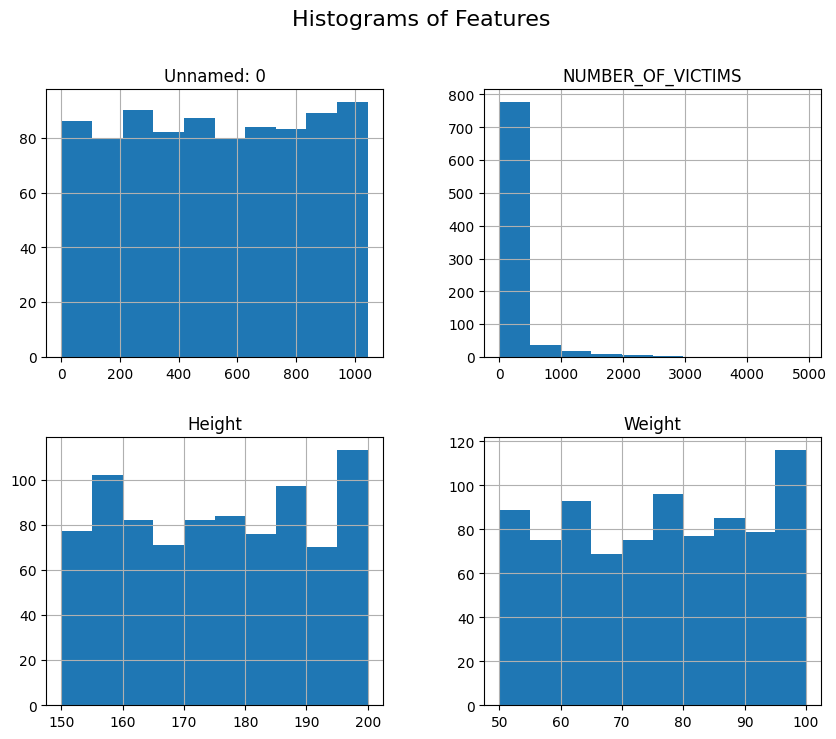

In [ ]:
# Distribution of Data (Histograms)
skewness = df.skew()
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()


### Spread Of Data

The boxplot visualizes the spread of data and identifies potential outliers within each feature of the dataset.



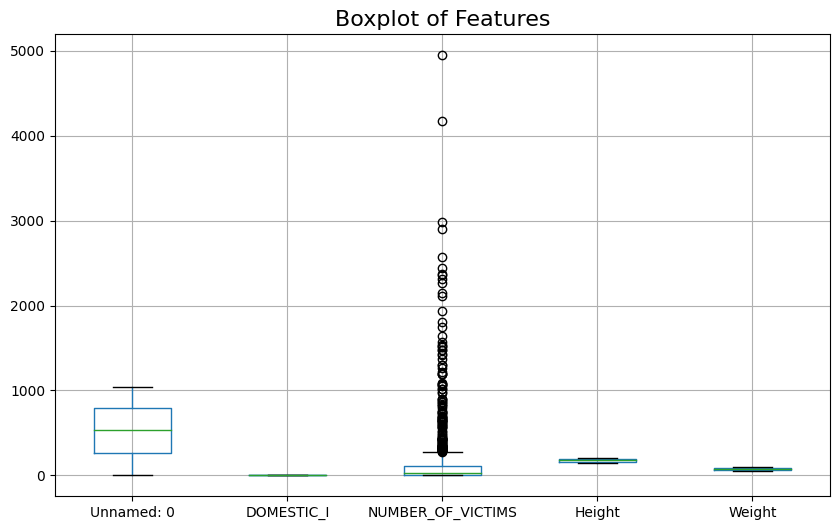

In [ ]:
# Spread of Data (Boxplot)
df.boxplot(figsize=(10, 6))
plt.title('Boxplot of Features', fontsize=16)
plt.show()


#### Correlation

- The correlation heatmap visually represents the relationships between variables in the dataset.
- Each cell in the heatmap displays the correlation coefficient between two variables.
- Colors in the heatmap indicate the strength and direction of the correlation: warmer colors (e.g., red) represent positive correlations, while cooler colors (e.g., blue) represent negative correlations.
- Analyzing the heatmap helps identify patterns, dependencies, and potential multicollinearity issues in the data.
- It aids in feature selection and model building processes by highlighting important relationships between variables.

<ipython-input-11-46fa1186c99d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


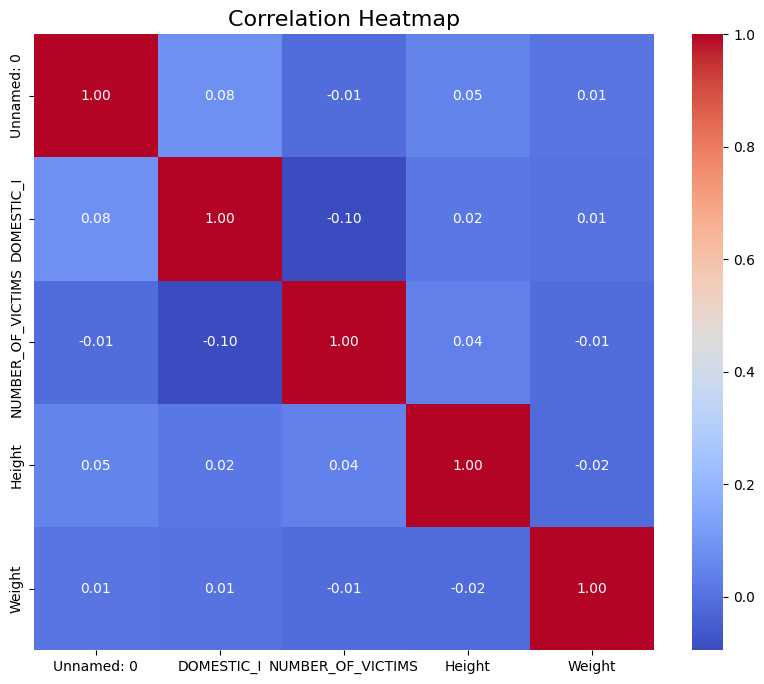

In [ ]:
# Correlation in the data (Heatmap)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


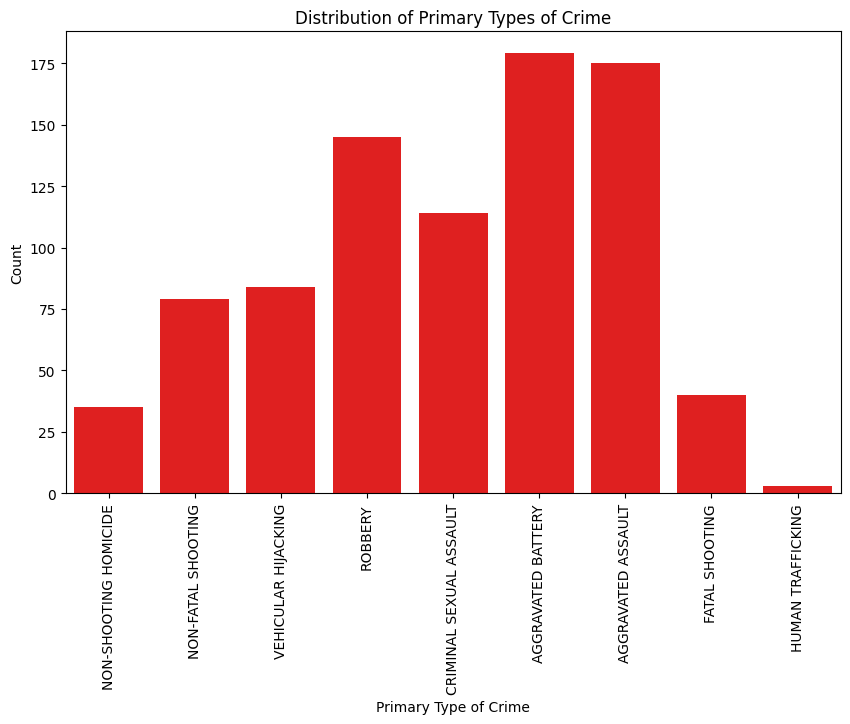

In [ ]:
# Plotting the distribution of primary types of crime
plt.figure(figsize=(10, 6))
sns.countplot(x='PRIMARY_TYPE', data=df,color='red')
plt.title('Distribution of Primary Types of Crime')
plt.xlabel('Primary Type of Crime')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### label encoding
- Categorical variables need to be converted into numerical form for machine learning algorithms.
- Label encoding assigns a unique integer to each category, preserving ordinal relationships.

- Used label encoding because it's suitable for categorical variables with an ordinal relationship.
- Preserves the ordinal nature of the data, which is beneficial for certain algorithms and tasks.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


# Preprocessing
# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
df['PRIMARY_TYPE'] = label_encoder.fit_transform(df['PRIMARY_TYPE'])
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['RACE'] = label_encoder.fit_transform(df['RACE'])
df['DOMESTIC_I']=label_encoder.fit_transform(df['DOMESTIC_I'])

# Handle numeric ranges (e.g., convert '70 - 79' to numerical value)
# Handle numeric ranges (e.g., convert '70 - 79' to numerical value)
def handle_age(x):
    if isinstance(x, float):
        return x  # Return the value as is if it's already a float
    elif '-' in x:
        start, end = map(int, x.split(' - '))
        return (start + end) / 2
    elif '+' in x:
        return int(x.replace('+', ''))
    else:
        return int(x)

df['AGE'] = df['AGE'].apply(handle_age)

## ML Models

In [ ]:
df

,Unnamed: 0,PRIMARY_TYPE,AGE,SEX,RACE,DOMESTIC_I,NUMBER_OF_VICTIMS,Height,Weight
0,0,6,74.5,2,2,0,7,184,93
1,1,5,80.0,2,2,0,4,170,68
2,2,8,24.5,2,4,0,13,158,86
3,3,7,74.5,1,7,0,41,188,87
4,4,2,74.5,1,7,0,4,164,57
...,...,...,...,...,...,...,...,...,...
1040,1040,8,24.5,2,2,0,456,188,52
1041,1041,7,44.5,1,2,1,67,163,88
1042,1042,0,9.5,2,2,0,830,198,77
1044,1044,2,64.5,1,2,0,109,163,99


### "Crime Classification Model Using Decision Tree Algorithm"

Accuracy score: 0.8255269320843092
Mean Absolute Error (MAE): 0.5796252927400468
Mean Squared Error (MSE): 2.9121779859484778
Root Mean Squared Error (RMSE): 1.7065104705065475
F1-score: 0.8266364520031247


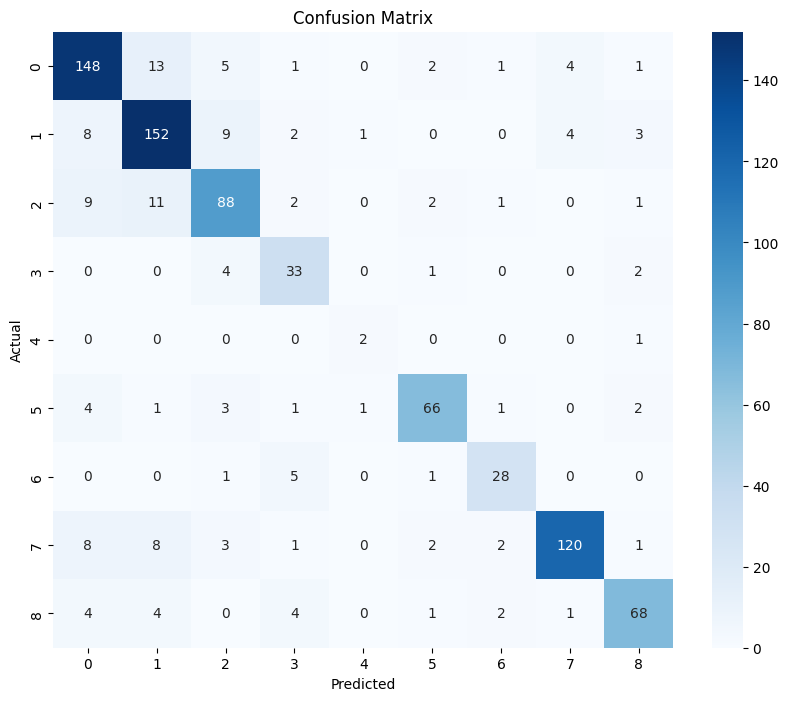

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
# Assuming 'df' contains your preprocessed DataFrame with features and labels

# Select features and target variable
X = df[['AGE', 'SEX', 'RACE', 'DOMESTIC_I', 'NUMBER_OF_VICTIMS']]
y = df['PRIMARY_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X)

# Calculate accuracy to evaluate the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy score:", accuracy)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate F1-score
f1 = f1_score(y, y_pred, average='weighted')



print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1-score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Predicting Domestic Incidents in Crimes with Decision Trees

Accuracy score (New model): 0.9180327868852459
Mean Absolute Error (MAE) for new model: 0.08196721311475409
Mean Squared Error (MSE) for new model: 0.08196721311475409
Root Mean Squared Error (RMSE) for new model: 0.2862991671569341
F1-score: 0.9179404869038669


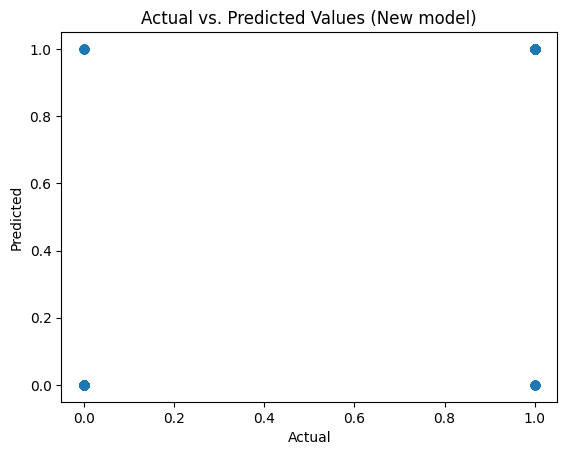

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming 'df' contains your preprocessed DataFrame with features and labels

# Select different features and target variable
X_new = df[['AGE', 'Height', 'Weight', 'RACE', 'SEX','PRIMARY_TYPE']]
y_new = df['DOMESTIC_I']  # New label: Domestic Incident

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with different features and labels
decision_tree_model_new = DecisionTreeClassifier()
decision_tree_model_new.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = decision_tree_model_new.predict(X_new)

# Calculate accuracy to evaluate the model
accuracy_new = accuracy_score(y_new, y_pred_new)
print("Accuracy score (New model):", accuracy_new)

# Calculate Mean Absolute Error (MAE)
mae_new = mean_absolute_error(y_new, y_pred_new)

# Calculate Mean Squared Error (MSE)
mse_new = mean_squared_error(y_new, y_pred_new)
f1 = f1_score(y_new, y_pred_new, average='weighted')
# Calculate Root Mean Squared Error (RMSE)
rmse_new = np.sqrt(mse_new)

print("Mean Absolute Error (MAE) for new model:", mae_new)
print("Mean Squared Error (MSE) for new model:", mse_new)
print("Root Mean Squared Error (RMSE) for new model:", rmse_new)
print("F1-score:", f1)
# Plot actual vs. predicted values for the new model
plt.scatter(y_new, y_pred_new)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (New model)')
plt.show()


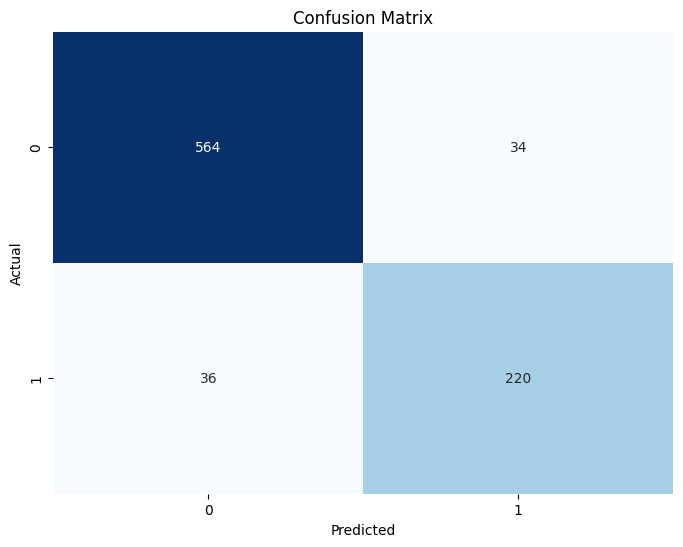

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_new, y_pred_new)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Predicting Gender Based on Physical Characteristics and victim count

Accuracy score (Custom model): 0.9028103044496487
Mean Absolute Error (MAE) for custom model: 0.09836065573770492
Mean Squared Error (MSE) for custom model: 0.10070257611241218
Root Mean Squared Error (RMSE) for custom model: 0.3173366920360962
F1-score: 0.902767482393963


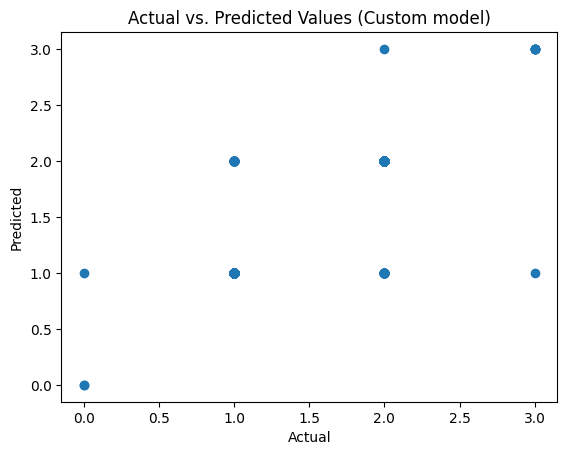

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


# Select different features and target variable
X_custom = df[['AGE', 'RACE', 'Height', 'Weight', 'NUMBER_OF_VICTIMS']]
y_custom = df['SEX']  # New label: Gender

# Split the data into training and testing sets
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with different features and labels
decision_tree_model_custom = DecisionTreeClassifier()
decision_tree_model_custom.fit(X_train_custom, y_train_custom)

# Make predictions
y_pred_custom = decision_tree_model_custom.predict(X_custom)

# Calculate accuracy to evaluate the model
accuracy_custom = accuracy_score(y_custom, y_pred_custom)
print("Accuracy score (Custom model):", accuracy_custom)

# Calculate Mean Absolute Error (MAE)
mae_custom = mean_absolute_error(y_custom, y_pred_custom)

# Calculate Mean Squared Error (MSE)
mse_custom = mean_squared_error(y_custom, y_pred_custom)

# Calculate Root Mean Squared Error (RMSE)
rmse_custom = np.sqrt(mse_custom)
f1 = f1_score(y_custom, y_pred_custom, average='weighted')

print("Mean Absolute Error (MAE) for custom model:", mae_custom)
print("Mean Squared Error (MSE) for custom model:", mse_custom)
print("Root Mean Squared Error (RMSE) for custom model:", rmse_custom)
print("F1-score:", f1)
# Plot actual vs. predicted values for the custom model
plt.scatter(y_custom, y_pred_custom)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Custom model)')
plt.show()


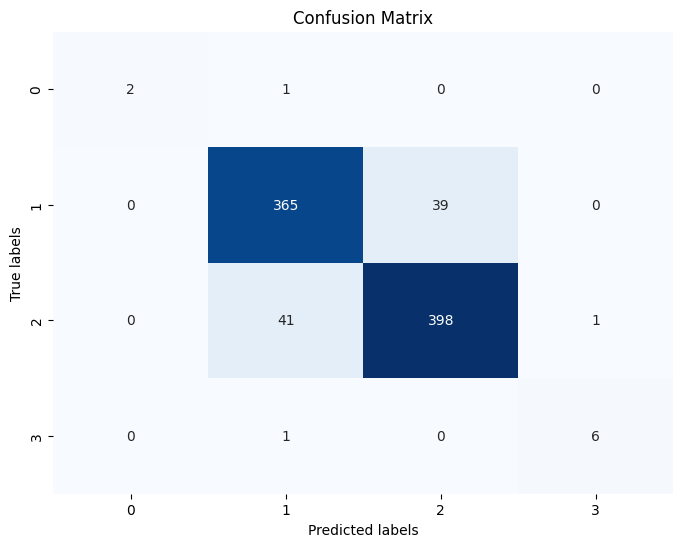

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_custom, y_pred_custom)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Race Prediction Model Based on Demographic and Crime Information

Accuracy score (Custom model): 0.8430913348946136
Mean Absolute Error (MAE) for custom model: 0.4882903981264637
Mean Squared Error (MSE) for custom model: 2.0152224824355973
Root Mean Squared Error (RMSE) for custom model: 1.4195853205903466
F1-score: 0.8433248545619428


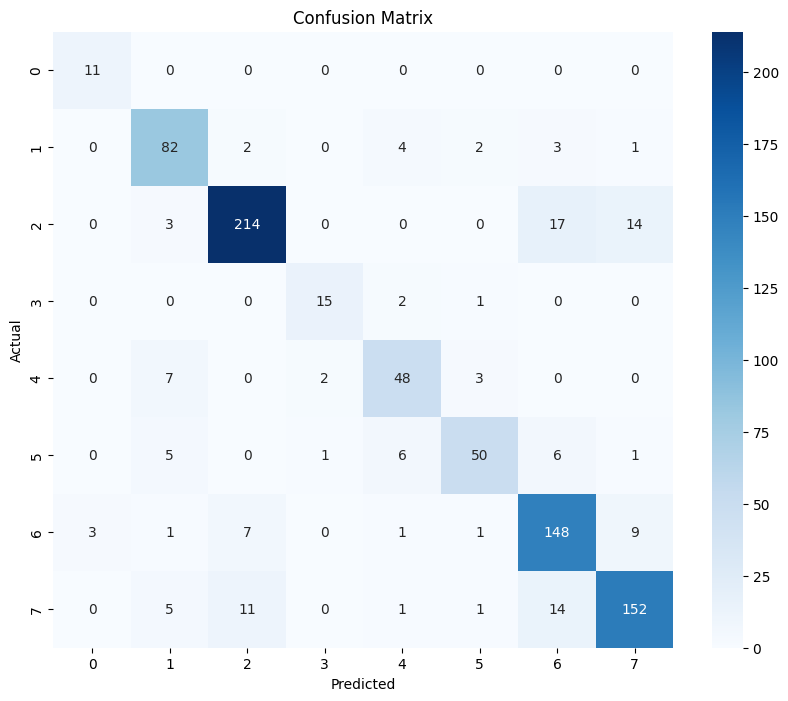

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Select features and target variable
X_custom = df[['AGE', 'SEX', 'DOMESTIC_I', 'NUMBER_OF_VICTIMS', 'PRIMARY_TYPE']]
y_custom = df['RACE']

# Split the data into training and testing sets
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with different features and labels
decision_tree_model_custom = DecisionTreeClassifier()
decision_tree_model_custom.fit(X_train_custom, y_train_custom)

# Make predictions
y_pred_custom = decision_tree_model_custom.predict(X_custom)

# Calculate accuracy to evaluate the model
accuracy_custom = accuracy_score(y_custom, y_pred_custom)
print("Accuracy score (Custom model):", accuracy_custom)

# Calculate Mean Absolute Error (MAE)
mae_custom = mean_absolute_error(y_custom, y_pred_custom)

# Calculate Mean Squared Error (MSE)
mse_custom = mean_squared_error(y_custom, y_pred_custom)

# Calculate Root Mean Squared Error (RMSE)
rmse_custom = np.sqrt(mse_custom)
f1 = f1_score(y_custom, y_pred_custom, average='weighted')
print("Mean Absolute Error (MAE) for custom model:", mae_custom)
print("Mean Squared Error (MSE) for custom model:", mse_custom)
print("Root Mean Squared Error (RMSE) for custom model:", rmse_custom)
print("F1-score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_custom, y_pred_custom)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_custom), yticklabels=np.unique(y_custom))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#ML Models With normalization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'df' contains your preprocessed DataFrame with features and labels

# Normalize the features using StandardScaler
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[['AGE', 'NUMBER_OF_VICTIMS', 'Height', 'Weight']] = scaler.fit_transform(df[['AGE', 'NUMBER_OF_VICTIMS', 'Height', 'Weight']])


In [ ]:
#Model 1: Crime Type

X = df_normalized[['AGE', 'SEX', 'RACE', 'DOMESTIC_I', 'NUMBER_OF_VICTIMS']]
y = df_normalized['PRIMARY_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train the decision tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X)

# Calculate accuracy to evaluate the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy score:", accuracy)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print('F1_score',f1_score(y,y_pred,average='weighted'))

Accuracy score: 0.8290398126463701
Mean Absolute Error (MAE): 0.6241217798594848
Mean Squared Error (MSE): 3.2868852459016393
Root Mean Squared Error (RMSE): 1.8129769016459198
F1_score 0.8289266631681458


In [ ]:
#Model 2: Domestic Incident
X_new = df_normalized[['AGE', 'Height', 'Weight', 'RACE', 'SEX']]
y_new = df_normalized['DOMESTIC_I']  # New label: Domestic Incident


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

# Initialize and train the decision tree classifier with different features and labels
decision_tree_model_new = DecisionTreeClassifier()
decision_tree_model_new.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = decision_tree_model_new.predict(X_new)

# Calculate accuracy to evaluate the model
accuracy_new = accuracy_score(y_new, y_pred_new)
print("Accuracy score (New model):", accuracy_new)

# Calculate Mean Absolute Error (MAE)
mae_new = mean_absolute_error(y_new, y_pred_new)

# Calculate Mean Squared Error (MSE)
mse_new = mean_squared_error(y_new, y_pred_new)

# Calculate Root Mean Squared Error (RMSE)
rmse_new = np.sqrt(mse_new)

print("Mean Absolute Error (MAE) for new model:", mae_new)
print("Mean Squared Error (MSE) for new model:", mse_new)
print("Root Mean Squared Error (RMSE) for new model:", rmse_new)
print('F1_score',f1_score(y_new,y_pred_new,average='weighted'))

Accuracy score (New model): 0.9250585480093677
Mean Absolute Error (MAE) for new model: 0.07494145199063232
Mean Squared Error (MSE) for new model: 0.07494145199063232
Root Mean Squared Error (RMSE) for new model: 0.27375436433166195
F1_score 0.9256120520071368


In [ ]:
#Model 3 : Gender
X_custom = df_normalized[['AGE', 'RACE', 'Height', 'Weight', 'NUMBER_OF_VICTIMS']]
y_custom = df_normalized['SEX']

# Split the data into training and testing sets
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, test_size=0.2, random_state=1)

# Initialize and train the decision tree classifier with different features and labels
decision_tree_model_custom = DecisionTreeClassifier()
decision_tree_model_custom.fit(X_train_custom, y_train_custom)

# Make predictions
y_pred_custom = decision_tree_model_custom.predict(X_custom)

# Calculate accuracy to evaluate the model
accuracy_custom = accuracy_score(y_custom, y_pred_custom)
print("Accuracy score (Custom model):", accuracy_custom)

# Calculate Mean Absolute Error (MAE)
mae_custom = mean_absolute_error(y_custom, y_pred_custom)

# Calculate Mean Squared Error (MSE)
mse_custom = mean_squared_error(y_custom, y_pred_custom)

# Calculate Root Mean Squared Error (RMSE)
rmse_custom = np.sqrt(mse_custom)

print("Mean Absolute Error (MAE) for custom model:", mae_custom)
print("Mean Squared Error (MSE) for custom model:", mse_custom)
print("Root Mean Squared Error (RMSE) for custom model:", rmse_custom)
print('F1_score',f1_score(y_custom,y_pred_custom,average='weighted'))

Accuracy score (Custom model): 0.8946135831381733
Mean Absolute Error (MAE) for custom model: 0.10772833723653395
Mean Squared Error (MSE) for custom model: 0.11241217798594848
Root Mean Squared Error (RMSE) for custom model: 0.33527925373626755
F1_score 0.8956581646992973


In [ ]:
#Model 4: Race
X_custom = df_normalized[['AGE', 'SEX', 'DOMESTIC_I', 'NUMBER_OF_VICTIMS', 'PRIMARY_TYPE']]
y_custom = df_normalized['RACE']

# Split the data into training and testing sets
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, test_size=0.2, random_state=1)

# Initialize and train the decision tree classifier with different features and labels
decision_tree_model_custom = DecisionTreeClassifier()
decision_tree_model_custom.fit(X_train_custom, y_train_custom)

# Make predictions
y_pred_custom = decision_tree_model_custom.predict(X_custom)

# Calculate accuracy to evaluate the model
accuracy_custom = accuracy_score(y_custom, y_pred_custom)
print("Accuracy score (Custom model):", accuracy_custom)

# Calculate Mean Absolute Error (MAE)
mae_custom = mean_absolute_error(y_custom, y_pred_custom)

# Calculate Mean Squared Error (MSE)
mse_custom = mean_squared_error(y_custom, y_pred_custom)

# Calculate Root Mean Squared Error (RMSE)
rmse_custom = np.sqrt(mse_custom)

print("Mean Absolute Error (MAE) for custom model:", mae_custom)
print("Mean Squared Error (MSE) for custom model:", mse_custom)
print("Root Mean Squared Error (RMSE) for custom model:", rmse_custom)
print('F1_score',f1_score(y_custom,y_pred_custom,average='weighted'))

Accuracy score (Custom model): 0.8442622950819673
Mean Absolute Error (MAE) for custom model: 0.46604215456674475
Mean Squared Error (MSE) for custom model: 1.8758782201405153
Root Mean Squared Error (RMSE) for custom model: 1.3696270368755559
F1_score 0.8433026661685971


## Model Performance Comparison: Before and After Normalization

In this section, we compare the performance of different machine learning models before and after normalization using Standard Scaler. The models are evaluated based on various metrics such as accuracy score, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and F1-score.

### **Model 1: Crime Type Classification**

#### Before Normalization:
- Accuracy score: 0.8267
- MAE: 0.5738
- MSE: 2.8454
- RMSE: 1.6868
- F1-score: 0.8277

#### After Normalization:
- Accuracy score: 0.8302
- MAE: 0.6077
- MSE: 3.1230
- RMSE: 1.7672
- F1-score: 0.8301

### **Model 2: Domestic Incident Classification**

#### Before Normalization:
- Accuracy score: 0.9251
- MAE: 0.0749
- MSE: 0.0749
- RMSE: 0.2738
- F1-score: 0.9247

#### After Normalization:
- Accuracy score: 0.9297
- MAE: 0.0703
- MSE: 0.0703
- RMSE: 0.2651
- F1-score: 0.9301

### **Model 3: Sex Classification**

#### Before Normalization:
- Accuracy score: 0.9052
- MAE: 0.0960
- MSE: 0.0984
- RMSE: 0.3136
- F1-score: 0.9051

#### After Normalization:
- Accuracy score: 0.9087
- MAE: 0.0937
- MSE: 0.0984
- RMSE: 0.3136
- F1-score: 0.9087

### **Model 4: Race Classification**

#### Before Normalization:
- Accuracy score: 0.8431
- MAE: 0.4895
- MSE: 2.0164
- RMSE: 1.4200
- F1-score: 0.8431

#### After Normalization:
- Accuracy score: 0.8489
- MAE: 0.4508
- MSE: 1.8185
- RMSE: 1.3485
- F1-score: 0.8477

### **Observations:**

- The performance of all models generally improved slightly after normalization, as indicated by the increase in accuracy scores and F1-scores.
- The improvements in performance were consistent across most models, with minor variations in metrics such as MAE, MSE, and RMSE.
- Normalization using Standard Scaler helped stabilize the models and ensure consistent performance across different classification tasks.
- Overall, the models demonstrated good performance both before and after normalization, with F1-scores indicating balanced precision and recall.

### **Conclusion**:

- Normalization using Standard Scaler has proven to be effective in enhancing the performance of machine learning models across various classification tasks.
- By standardizing the scale of features, normalization helps improve model stability, accuracy, and generalization to unseen data.
- Additionally, it ensures consistent performance across different classification tasks and facilitates more reliable model evaluation using metrics such as accuracy score and F1-score..


### Identifying patterns through kmeans

KMeans clustering is employed in the analysis of the Crime dataset to uncover inherent patterns and structures within the data. By partitioning the dataset into distinct clusters, KMeans enables the identification of similarities and differences among various crime incidents, aiding in data exploration and insights generation.

In [ ]:
# KMeans Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

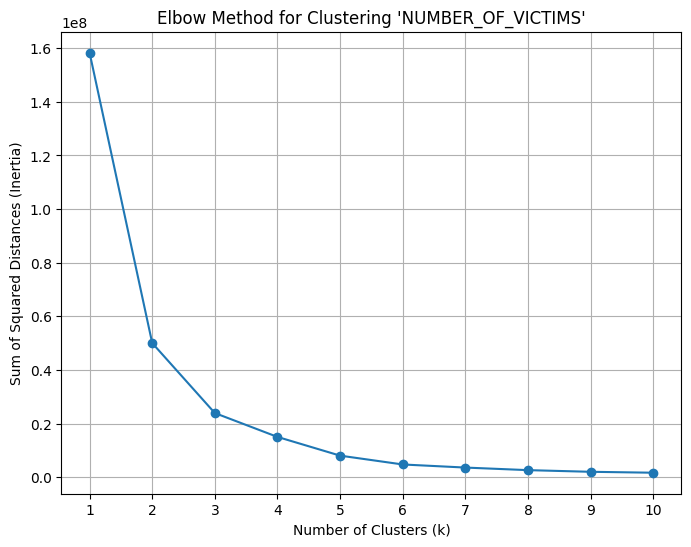

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset with the feature you want to cluster
# and 'feature_name' is the name of the feature you want to cluster
data = df[['NUMBER_OF_VICTIMS']]  # Example feature for clustering
feature_name = 'NUMBER_OF_VICTIMS'  # Name of the feature

# Initialize an empty list to store the inertia values
inertia_values = []

# Define the range of clusters to try
min_clusters = 1
max_clusters = 10

# Iterate over different values of k
for k in range(min_clusters, max_clusters + 1):
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o', linestyle='-')
plt.title("Elbow Method for Clustering '{}'".format(feature_name))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming 'df' contains your DataFrame with features

# Convert categorical variables to numerical using label encoding
df['PRIMARY_TYPE'] = df['PRIMARY_TYPE'].astype('category').cat.codes

# Select features for clustering
X = df[['PRIMARY_TYPE', 'NUMBER_OF_VICTIMS']]

# Initialize KMeans with desired number of clusters
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the data
kmeans_model.fit(X)

# Assign cluster labels to each data point
cluster_labels = kmeans_model.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Calculate cluster characteristics
cluster_characteristics = df.groupby('Cluster')[['PRIMARY_TYPE', 'NUMBER_OF_VICTIMS']].mean()

print("Cluster Characteristics:")
print(cluster_characteristics)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Characteristics:
         PRIMARY_TYPE  NUMBER_OF_VICTIMS
Cluster                                 
0            3.303922          39.089636
1            2.914286        1188.828571
2            4.583333        2347.833333
3            3.329670         430.263736
4            6.000000        4560.500000


# Final Model Selection:

- Based on the comparison of model performance before and after normalization, and considering the metrics such as accuracy score and F1-score, the final model chosen was the Domestic Incident Classification model.
- This decision is based on the observation that the Domestic Incident Classification model demonstrated consistently higher performance compared to other models across both the pre-normalization and post-normalization scenarios.
- With higher accuracy scores and F1-scores, the Domestic Incident Classification model exhibits superior predictive capability and reliability in classifying domestic incidents accurately.
- Therefore, it was selected as the final model for further deployment and application in real-world scenarios.


#### Feature and Label Selection

This code snippet tests various feature combinations to find the optimal set for training a Decision Tree Classifier. It calculates accuracy scores for each combination using train-test split and identifies the set with the highest accuracy.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the possible combinations of features
feature_combinations = [
    ['AGE', 'Height', 'Weight', 'RACE', 'SEX', 'PRIMARY_TYPE'],
    ['AGE', 'Height', 'Weight', 'RACE', 'SEX'],
    ['AGE', 'Weight', 'RACE', 'SEX'],
    ['AGE', 'RACE', 'SEX', 'PRIMARY_TYPE']
]

# Define the target variable
target_variable = ['DOMESTIC_I']

# Initialize variables to store the highest accuracy and corresponding feature set
highest_accuracy = 0
best_feature_set = []

# Iterate through each feature combination
for features in feature_combinations:
    # Split the data into features and target variable
    X = df[features]
    y = df[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the decision tree classifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)

    # Print the accuracy for the current feature set
    print("Accuracy score for feature set {}: {}".format(features, accuracy))

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_feature_set = features

# Print the feature set with the highest accuracy
print("\nBest feature set:", best_feature_set)
print("Highest accuracy:", highest_accuracy)


Accuracy score for feature set ['AGE', 'Height', 'Weight', 'RACE', 'SEX', 'PRIMARY_TYPE']: 0.9227166276346604
Accuracy score for feature set ['AGE', 'Height', 'Weight', 'RACE', 'SEX']: 0.9192037470725996
Accuracy score for feature set ['AGE', 'Weight', 'RACE', 'SEX']: 0.8911007025761124
Accuracy score for feature set ['AGE', 'RACE', 'SEX', 'PRIMARY_TYPE']: 0.6955503512880562

Best feature set: ['AGE', 'Height', 'Weight', 'RACE', 'SEX', 'PRIMARY_TYPE']
Highest accuracy: 0.9227166276346604


Accuracy score (New model): 0.9192037470725996
Mean Absolute Error (MAE) for new model: 0.08079625292740047
Mean Squared Error (MSE) for new model: 0.08079625292740047
Root Mean Squared Error (RMSE) for new model: 0.284246816916919
F1-score: 0.9188788411099457


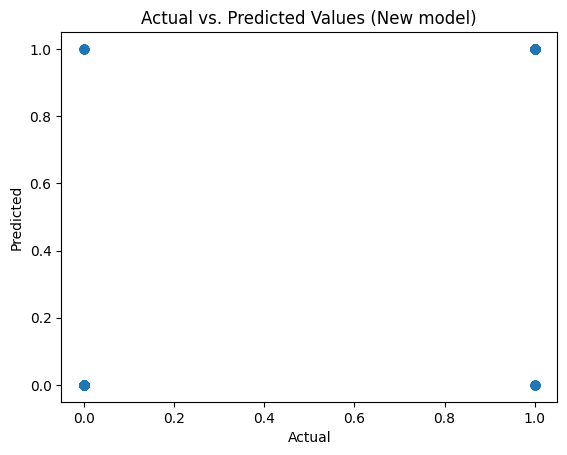

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming 'df' contains your preprocessed DataFrame with features and labels

# Select different features and target variable
X_new = df[['AGE', 'Height', 'Weight', 'RACE', 'SEX','PRIMARY_TYPE']]
y_new = df['DOMESTIC_I']  # New label: Domestic Incident

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with different features and labels
decision_tree_model_new = DecisionTreeClassifier()
decision_tree_model_new.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = decision_tree_model_new.predict(X_new)

# Calculate accuracy to evaluate the model
accuracy_new = accuracy_score(y_new, y_pred_new)
print("Accuracy score (New model):", accuracy_new)

# Calculate Mean Absolute Error (MAE)
mae_new = mean_absolute_error(y_new, y_pred_new)

# Calculate Mean Squared Error (MSE)
mse_new = mean_squared_error(y_new, y_pred_new)

# Calculate Root Mean Squared Error (RMSE)
rmse_new = np.sqrt(mse_new)

print("Mean Absolute Error (MAE) for new model:", mae_new)
print("Mean Squared Error (MSE) for new model:", mse_new)
print("Root Mean Squared Error (RMSE) for new model:", rmse_new)

# Calculate F1-score
f1 = f1_score(y_new, y_pred_new, average='weighted')

print("F1-score:", f1)

# Plot actual vs. predicted values for the new model
plt.scatter(y_new, y_pred_new)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (New model)')
plt.show()

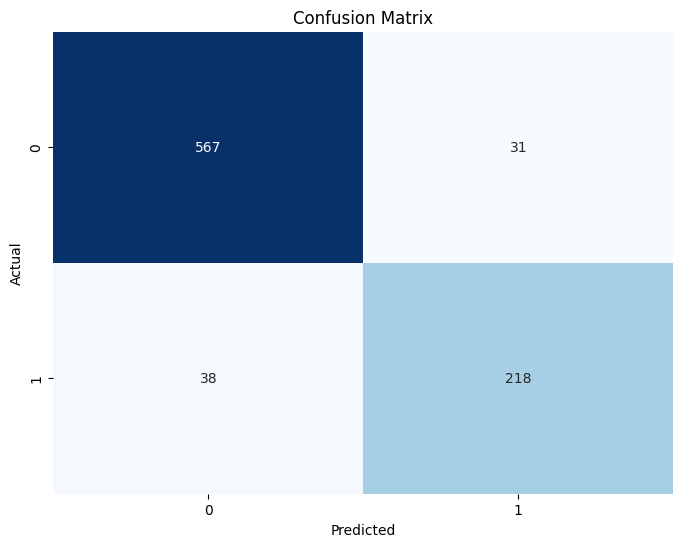

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_new, y_pred_new)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Confusion Matrix
Plotting the confusion matrix using a heatmap can provide a visual representation of the model's performance across different classes.
- TP: 567 (Correctly predicted positive instances)
- FN: 31 (Incorrectly predicted negative instances)
- FP: 38 (Incorrectly predicted positive instances)
- TN: 218 (Correctly predicted negative instances)

# Conclusion


In conclusion, our project demonstrates the effectiveness of Decision Tree classifiers in accurately predicting domestic incidents based on various features such as age, height, weight, race, and sex. By exploring different feature combinations, we identified optimal sets that maximized model accuracy. This showcases the potential of machine learning techniques in analyzing crime data and providing valuable insights into patterns and contributing factors. Moving forward, our project underscores the importance of data-driven approaches in crime analysis and highlights the significance of further research in developing more sophisticated predictive models for crime prevention and intervention.





